# Finding the best algorithm to Predict if a Person smokes or does not smoke based on his insurance cost and his Body Mass Index


By: Jonathan Hafez

## Introduction


For this final project, I decided to try and predict if a person is a smoker or not, based on his body mass index and with insrance cost. In order to predict this values, I had to firstly fix and manipulate the data for it to be easy to use and understand. The reason why I'm doing the project with this dataset, is beacuse I want to to learn how this different algorithms work and most importanly how they differentiate from each other. Also, although the cost depends on if he's a smoker or not, I want to know if its possible to prefectly predict if someone is a smoker or not based on other values.
In order to predict, if someone smokes, I used a combination of algorithms to analyze the cost of a person's insurance and their Body Mass Index (BMI) and how it releates to the smoking status of each person. This algorithms include:
- K-means Clustering: It groups data points into clusters based on similarity.
- Regression Trees: Maps the relationship between different variables and an outcome. 
- Random Forest: It uses an ensemble of decision trees to make predictions for classification and regression tasks.
- Linear Regression: It's a linear model used for regression tasks.

After using all of this algorithms on the data, my goal is to find the one that better predicts if someone is a smoker or not. In order to properly messure the accuracy of each of the algorithms, the Mean Square Error and the R-squared will be calculated for each method. Ideally, the best algorithm will have the lowest mean square error and the highest R-squared.


## Data


 In order to fulfill this project, I decided to use a dataset that comes from google Kaggle and it's called 'insurance'. This dataset, has many different columns, which columns names include the number of children a person has, sex, age, region, body mass index, if he smokes or not, and how much he pays for his health insurance. On the other hand, there are 1338 rows, where each represents a different person and his respective value for each variable.
 This kind of data can be used to predict and forsee certain values, by analizing previous numbers. Here, many different predictions can be made, as for example predicting the range of the cost of the insurance based on different variables, between others. For my study, I decided to do something different and to predict if a person smokes or not based only on what he pays for insurance and by his Body Mass Index.

In [ ]:
#  This is an example of what the first row of the dataset looks like. (Here, the qualitative values have not been modified yet)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


## Methodology

Here, there is a more in depth explanaition of each of the algorithms I used and how they work.

**K_mean Clustering:**
In this case, we can use Kmeans clustering to group people together based on their insurance payments and BMI. We can then use this data to predict if a person smokes or not. For example, if the majority of people in a particular cluster pay high insurance payments and have a high BMI, then it is likely that the people in that cluster are smokers. Conversely, if the majority of people in a certain cluster pay low insurance payments and have a low BMI, then it is likely that the people in that cluster do not smoke. By using Kmeans clustering to group people together and predict if they smoke or not, we can get a better understanding of how insurance payments and BMI can be used to predict smoking behavior.

**Regression Trees:**
The regression tree algorithm works by splitting the dataset into different branches based on specific characteristics. For example, the tree might first split the data into two branches based on the  cost, with one branch for those with higher costs and another for those with lower costs. Then, it will further split the data into branches based on BMI, creating more and more branches until the tree is complete. 
Once the tree is complete, the algorithm can make a prediction as to whether a person smokes or not. It will look at the characteristics of a person and determine which branch they fall into. Then, based on the data in that branch, the algorithm can make a prediction as to whether the person smokes or not. 

**Random Forest:** This algorithm works by training multiple decision trees on the data. Each tree is trained to make predictions based on a different subset of the data, and the predictions from all of the trees are combined to make a final prediction.
Once the random forest algorithm has been trained, it can be used to make predictions on new data. It will look at the characteristics of a person, their  costs and BMI, and use the trained decision trees to make a prediction as to whether they are likely to smoke or not.

**Linear Regression**:
The linear regression algorithm works by fitting a straight line to the data that best describes the relationship between the different variables. In this case, the algorithm would look at the relationship between insurance costs, BMI, and the likelihood of a person smoking. Once the line has been fitted, the algorithm can use it to make predictions on new data.
For example, if a person has a high insurance cost and a high BMI, the algorithm would use the fitted line to predict that they have a high likelihood of smoking. On the other hand, if a person has a low insurance cost and a low BMI, the algorithm would predict that they have a low likelihood of smoking.

Overall, I chose these analysis techniques because they are powerful tools for identifying patterns and trends in data, to make accurate predictions. Also, I wanted to learn how this algorithms differentiate betweem one another, and I wanted to experience those differences by working and using this machine learning methods.


## Analysis

In [ ]:
# Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics  
from sklearn.ensemble import RandomForestRegressor
import math  
import sklearn.metrics 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Converting my Qualitative data into Quantitative data
le = LabelEncoder()

df['region'] = le.fit_transform(df['region'])
df['sex'] = df['sex'].apply(lambda x : 1 if x == 'female' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x== 'yes' else 0 )
df['charges'] = df['charges'].apply(lambda x: x/1000 )


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


### Vizualizing some of the data



In [ ]:

import plotly.express as px
fig = px.scatter_3d(df, x='bmi', y='charges', z= 'children')
fig.show()

### Preparing my data for clustering and Regression 

In [ ]:
# Splitting my data into training and testing sets

# We are dropping the 'smoker' column because I will use it for the Y_sample and test
X=df.drop('smoker',axis='columns')
Y= df['smoker']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
df0 = pd.DataFrame(X_train, columns=['charges', 'bmi'])
df0.head(7)

,charges,bmi
882,2.585851,22.135
505,6.796863,30.875
798,11.848141,33.100
792,2.731912,23.180
201,8.871152,32.230
265,46.151124,42.350
285,7.742110,26.620


### Clustering

On this step, we are finding hte oprimal number of clusters for the data we are analizing

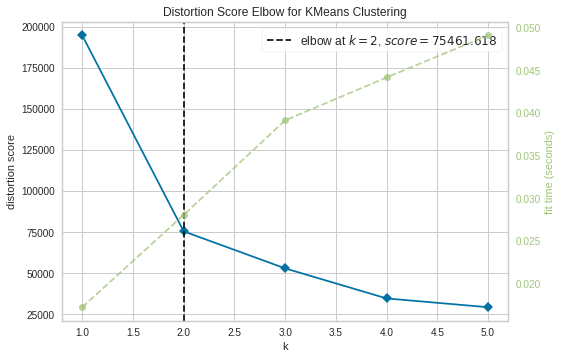

In [ ]:
#  Using previous values in order to find the apppropiate cluster value
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6)).fit(df0)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df0)

In [ ]:
print('The optimal clusters are \n', kmeans3.cluster_centers_)

The optimal clusters are 
 [[36.28169965 32.94905914]
 [ 8.55561982 30.21817308]]


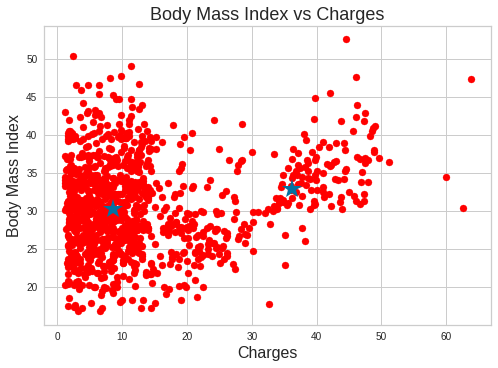

In [ ]:

plt.scatter(df0['charges'], df0['bmi'], c ='red')
plt.title('Body Mass Index vs Charges',fontsize=18)
plt.xlabel('Charges',fontsize=16)
plt.ylabel('Body Mass Index',fontsize=16)
plt.plot([ kmeans3.cluster_centers_[1,0],kmeans3.cluster_centers_[0,0]], [kmeans3.cluster_centers_[1,1],kmeans3.cluster_centers_[0,1]  ], marker='*', ls='none', ms=20)
# plt.plot([ 8.55561982,36.28169965], [30.21817308,32.94905914  ], marker='*', ls='none', ms=19)

In [ ]:
# Printing Kmeans3.labels
kmeans3.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Function  that can predict if smoker or not based on previous clustering results.
This function predicts if a person is a smoker or not based on what he pays for the insurance as well as by his body mass index, or better know as BMI.

In [ ]:
# These are the centroids, clusters,I previously calculated
c1= kmeans3.cluster_centers_[1,:]
c2=  kmeans3.cluster_centers_[0,:]

def smoker_predictor(chargesu,bmi):
  # Because the row  of 'charges' was divided by a 1000 in the beggining, we must do the 
  # the same here in order to have appropiate results
  charges = chargesu
  v1= (charges - c1[0])**2 + (bmi - c1[1])**2
  v2= (charges - c2[0])**2 + (bmi- c2[1])**2
  if v1 <= v2:
    return 0
    # print('He doesnt smoke')
  else:
    # print('He smokes')
    return 1
print(smoker_predictor(180091,31))


1


In [ ]:
#  Here, I will convert the Y_train into a list. This in order to make it easier to work with
df2 = Y_test.copy()
df2=df2.reset_index()
df2 = df2.drop('index',axis='columns')
Ytestlist= list(df2['smoker'])
print(Ytestlist)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]


In [ ]:
def smoker_predictor(chargesu,bmi):
  listsm = []
  charges = chargesu
  v1= (charges - c1[0])**2 + (bmi - c1[1])**2
  v2= (charges - c2[0])**2 + (bmi- c2[1])**2
  if v1 <= v2:
    return 0
  else:
    return 1


In [ ]:
# This for loop, will decide on which cluster, each of our Y_test values should be in. This will create a list, called 'lis1t'
# with all of the respective clusters for each value
df3 = pd.DataFrame(X_test, columns=['charges', 'bmi']).values
lis1t = []
for i in range(len(df3)):
  f = smoker_predictor(df3[i][0], df3[i][1])
  if f == 1:
    lis1t += [1]
  else:
    lis1t += [0]
if len(lis1t) == len(Y_test):
  print('Both the lis1t variable and the Y_test have the same length')

Both the lis1t variable and the Y_test have the same length


In [ ]:
# In this step, I compare each of the values it predicted for Y_test based on X_test, with the actual Y_test.

df4 = pd.DataFrame(Y_test).values
x = 0
y = 0
for i in range(len(lis1t)):
  if lis1t[i] == df4[i]:
    x += 1
  else:
    y += 1

print('It predicted ', x, ' correct')
print('It predicted ', y, ' incorrectly')
print('Therefore, we can say it effectivly predicts',x/(x+y), 'of times.')


It predicted  238  correct
It predicted  30  incorrectly
Therefore, we can say it effectivly predicts 0.8880597014925373 of times.


In [ ]:
 

mse1 =(sklearn.metrics.mean_squared_error(Y_test,lis1t)) 
from sklearn.metrics import r2_score

# calculate the R^2 value
r21 = r2_score(Y_test, lis1t)

print('The R^2 value is', r21)
print("The mean square error is", mse1)

The R^2 value is 0.31370038412291945
The mean square error is 0.11194029850746269


### Regression Tree

In [ ]:
# Building a prediction from our values, using a regression tree
from sklearn.tree import DecisionTreeRegressor

X_test = pd.DataFrame(X_test, columns=['charges', 'bmi'])

model = DecisionTreeRegressor(random_state=44)
model.fit(df0, Y_train)
predictions = model.predict(X_test)

mse2 = (sklearn.metrics.mean_squared_error(Y_test, predictions))
r22 = r2_score(Y_test, predictions)

print('The R^2 value is', r22)
print("The difference between actual and predicted values", mse2) 


The R^2 value is 0.748356807511737
The difference between actual and predicted values 0.041044776119402986


## Linear Regresion

In [ ]:
l = LinearRegression()


l.fit(df0, Y_train)

predictions = l.predict(X_test)

mse3 = (sklearn.metrics.mean_squared_error(Y_test, predictions))
r23 = r2_score(Y_test, predictions)

print('The R^2 value is', r23)
print('The mean squared error is', mse3)

The R^2 value is 0.6130145350560436
The mean squared error is 0.0631200534893413


## Random Forest

In [ ]:

rf = RandomForestRegressor()
rf.fit(df0, Y_train)
predictions = rf.predict(X_test)


mse4 = (sklearn.metrics.mean_squared_error(Y_test, predictions))
r24 = r2_score(Y_test, predictions)

print('The R^2 value is', r24)
print('The mean squared error is', mse4)

The R^2 value is 0.867219325650875
The mean squared error is 0.021657462686567163


## Graphing the results of the Mean Square Error and R-Squared for each of the algorithms.


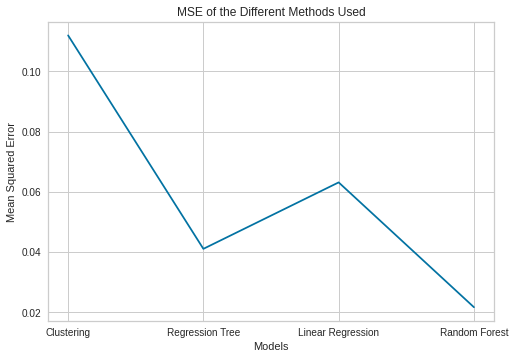

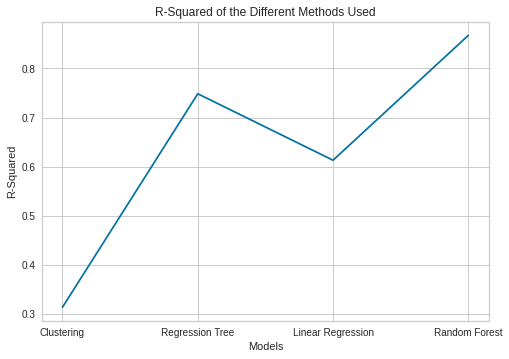

In [ ]:
import matplotlib.pyplot as plt

# list of MSE values
mse_values = [mse1, mse2,mse3,mse4]


mse_labels = ['Clustering', 'Regression Tree', 'Linear Regression', 'Random Forest']
plt.plot(mse_values)


plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE of the Different Methods Used')


plt.xticks(range(len(mse_values)), mse_labels)

plt.show()

#  Ploting the R-Squared
r2_values = [r21, r22,r23,r24]
r2_labels = ['Clustering', 'Regression Tree', 'Linear Regression', 'Random Forest']
plt.plot(r2_values)

plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.title('R-Squared of the Different Methods Used')

plt.xticks(range(len(r2_values)), r2_labels)
plt.show()


## Results.


After working with this four different algorithms, I realizd that in one way or another, all of this methods do have good prediction. Clustering which was the less accurate of them all, still had decent predictions. Even though this is the case, it is worth mentioning that non of these methods will have a perfect result at predicting the desired variable. To get the precise measurement of each respective wine, a hydrometer or other scientific methods should be used. Putting that information aside, the algorithms can give us a good approximation of the alcohol level.
 
 
 **Clustering**

- From the beginning, I knew there were better algorithms to measure and predict if someone smokes or not. This is due to the fact that this method is used for unsupervised learning, and it does not have a target variable and thus cannot be directly compared to a regression method. However, I still wanted to do clustering in order to see how it would react to this dataset. When running the clustering algorithm, I successfully found two different clusters that allowed me to use clustering as a forecaster. Although this cluster algorithm can try and predict whether a person is a smoker, the results are not as good as other methods. When running the algorithm for Y_test and X_test, it successfully predicted 88% of the output. However, I  think, that if the number of testing samples is increased, I would expect the clustering to predict less than 88%. This is because most of the difference this set of clusters can make is between the cost; the BMI does not have much of an influence. According to the clustering algorithm, If a person's price is closer to 8,500 than it is to 32,000, then he is not a smoker, and the same is the other way around. This is because the BMI, does not play such a role, as the difference between clusters is near.

**Regression Tree**

- In difference with the clustering method, the regression tree can have a more in-depth look at our X_test. In other words, the clustering algorithm mostly separated between high and low costs to predict if a person is a smoker or not. However, the regression tree on the other hand, can have a more in-depth look into high and low budgets. This will allow to a more in the depth analysis of our X and Y train, thus allowing us to predict the tests better. This is the reason why this method was the second best, accoding to the R-Squared test and the MSE, at predicting if someone smokes.

**Linear Regression**

- As compared with other methods, linear regression assumes that the relationship between the variables is linear, and it uses this assumption to make predictions based on the training data. Thus, the results showed that the algorithm was better at predicting the data than the clustering algorithm, as it had higher r-squared and lower mse, however, it was still worse than the Regression Tree and Random Forest. This may be because the algorithm only uses a single model to make predictions, and most importanly becaue it's not able to capture the complexity of the data as well as the other algorithms.

**Random Forest**

- By creating many different decisions tree, Random Forest is the best at predicting the most accurate outcome. The result of the MSE and R-squared was much better when using the Random Forest. The reason why this was the most accurate model, is because Random Forest is able to use many models in order to better predic the upcoming data. It creates many different decisions trees on the data, and uses the best one to predict. Due to the complexity of this methods, it allows the algorithm to have a better understanding of the data and thus predict using the best possible decision tree.


**Mean Square error and R-Squared**

- The mean squared error (MSE) and the R-squared value are two measures of how well a model fits a set of data. The MSE is calculated by taking the difference between the predicted values and the actual values, squaring each of these differences, and then taking the average of all the squared differences. The R-squared value is a measure of how much of the variance in the dependent variable (in this case, whether a person is a smoker or not) can be explained by the model. It is calculated by taking the squared differences between the predicted values and the mean of the actual values, and dividing this by the squared differences between the actual values and the mean of the actual values.



The values of this messures can be compared to determine which algorithm is the most effective at predicting whether a person smokes or not. The lower the MSE and the higher the R-squared value, the better the model. In this case, the Random Forest algorithm had the lowest MSE and the highest R-squared value, indicating that it was the best fit for the data and the most effective at making predictions. 

Based on the results, the order from more to less precise is:

1. Random Forest.
2. Regression Tree.
3. Linear Regression
4. Clustering

From here, it is clear that the regresson agorithms are better at predicting continous variables than clusters are. However, I still wanted to try and do the clustering algorithm in order to see what type of results it would have, and how far off this results would be from other, more complex, algorithms.

 

## Conclusion

In this study, we sought to determine the most effective machine learning algorithm for predicting whether a person smokes or not based on their insurance costs and BMI. To do this, I splitted the data into training and testing sets, and used four different machine learning algorithms to build predictive models on the training data.

I evaluated the performance of each algorithm using mean squared error (MSE) and R-squared values, which are measures of how well the model fits the data. The lower the MSE and the higher the R-squared, the better the model.

The results showed that the Random Forest algorithm had the lowest MSE and the highest R-squared value, indicating that it was the best fit for the data. This could be because the Random Forest algorithm is able to create multiple decision trees and combine them to make more accurate predictions, whereas the other algorithms were only able to use a single model to make predictions.

In conclusion, the results of this analysis suggest that the Random Forest algorithm is the most effective at predicting whether a person smokes or not based on their insurance costs and BMI. Using this algorithm can provide more accurate predictions and improve the overall performance of the model.



In conclusion, the results of this analysis suggest that the Random Forest algorithm was the most effective at predicting whether a person smokes or not based on their insurance costs and BMI. The Random Forest had the lowest mean squared error and the highest R-squared value, indicating that it was the best fit for the data. This may be because the Random Forest algorithm is able to create multiple decision trees and combine them to make more accurate predictions, whereas the other algorithms were only able to use a single model to make predictions. Overall, these results suggest that using the Random Forest algorithm can provide more accurate predictions for this type of data. However, there is no algorithm that can perfectly predict if someone is a smoker or not.

## References




1. [ Regression tree in Python](https://data36.com/regression-tree-python-scikit-learn/)

2.  [How to convert pandas columns to lists.](https://sparkbyexamples.com/pandas/conver-pandas-column-to-list/#:~:text=tolist()%20you%20can%20convert,the%20column%20values%20to%20list.)

3.  [Ploty's website
](https://plotly.com/)

4. [Train and Test Data](https://subscription.packtpub.com/book/data/9781838552862/1/ch01lvl1sec10/train-and-test-data)

5. [Understanding Clustering Better](https://stackabuse.com/k-means-clustering-with-scikit-learn/)

6. [Stack Overflow](https://stackoverflow.com/)

7. [Mean Square Error](https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error#:~:text=The%20Mean%20Squared%20Error%20measures,it%20relates%20to%20a%20function.)


8. [Elbow Method (clustering)](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

9. [DataSet](https://www.kaggle.com/datasets/mirichoi0218/insurance)

10. [Label Encouder](https://towardsdatascience.com/label-encoder-and-onehot-encoder-in-python-83d32288b592)

11. [Matemathic Behind Kmeans Clustering](https://heartbeat.comet.ml/understanding-the-mathematics-behind-k-means-clustering-40e1d55e2f4c?gi=3b78d2ff95e7])

12. [Detailed Explanaition on Regression Trees](https://data36.com/regression-tree-python-scikit-learn/#:~:text=Some%20explanation%3A,the%20future%20on%20new%20data.)

13. [Information on compering systems.](https://openaccess.city.ac.uk/id/eprint/15125/1/Guo%2C%20Shijing.pdf)

*Some of this websites, were also used for more information.*